In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style("whitegrid")

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

In [2]:
combined_df = pd.read_csv('../data/combined_mover_steps.csv')
combined_df.head()

,bottom_ci,info,mean,move_relative_day_bin,top_ci
0,280.245312,"* to New York, NY from below",5775.010731,"[-35, -25)",279.906833
1,286.936565,"* to New York, NY from below",5815.681747,"[-25, -15)",308.338219
2,279.292687,"* to New York, NY from below",5579.722737,"[-15, -5)",301.000651
3,NaN,"* to New York, NY from below",NaN,"[-5, 5)",NaN
4,290.503077,"* to New York, NY from below",6991.394178,"[5, 15)",297.458912


In [11]:
axis_fontsize=32
category_fontsize=32

def plot_df(ax, bootstrap_df, frame_color, left_color, right_color, linewidth=10., 
            left_linestyle='-', right_linestyle='-', middle_text_rotation=45, ylim=(5000, 8000)):
    info = bootstrap_df['info'].iloc[0]
    from_loc, to_loc_come_from = info.split(' to ')
    to_loc, come_from = to_loc_come_from.split(' from ')
        
    left_df = bootstrap_df.copy()
    left_df.loc[~left_df['move_relative_day_bin'].str.contains('-'), 'mean'] = np.nan
    
    right_df = bootstrap_df.copy()
    right_df.loc[right_df['move_relative_day_bin'].str.contains('-'), 'mean'] = np.nan
    
    sns.pointplot(x='move_relative_day_bin', y='mean',
                      data=left_df, ci=None,
                      # size=5, aspect=3, 
                      ax=ax, color=left_color,
                      scale=linewidth/3.,
                      linestyles=left_linestyle)
    sns.pointplot(x='move_relative_day_bin', y='mean',
                      data=right_df, ci=None,
                      # size=5, aspect=3, 
                      ax=ax, color=right_color,
                      scale=linewidth/3.,
                      linestyles=right_linestyle)
    
    unique_rel_days = list(pd.unique(bootstrap_df['move_relative_day_bin']))
    x_loc = [unique_rel_days.index(val) for val in bootstrap_df['move_relative_day_bin']]
    ax.errorbar(x=x_loc, y=bootstrap_df['mean'], 
                yerr=[bootstrap_df['bottom_ci'], bootstrap_df['top_ci']], 
                linestyle="None", ecolor=[left_color]*3 + [right_color]*4,
                elinewidth=linewidth)
    
    from_string = str(from_loc) if from_loc != '*' else ('Less Walkable Locations' if come_from == 'below' else 'More Walkable Locations')
    to_string = str(to_loc) if to_loc != '*' else ('Less Walkable Locations' if come_from == 'above' else 'More Walkable Locations')
#     ax.set_title('Moving from %s to %s' % (from_string, to_string))
        
    ax.grid(False)
    ax.axvline(x=3, color='#b0b0b0', linewidth=0.8, zorder=-1)
    ax.text(0.5, 0.5, ' Relocation ', 
            fontsize=axis_fontsize+10, 
            rotation=middle_text_rotation,
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes,
            bbox=dict(boxstyle='rarrow', fc='white', ec=frame_color, alpha=1.0, linewidth=linewidth))
    
    ax.set(xlabel=r'Days from Move $\left(t - t_{move}\right)$', ylabel='Daily Steps', ylim=ylim)
        
    def no_bracket_left(string):
        if '[' in string: 
            string = string.replace('[', '')
        if ']' in string: 
            string = string.replace(']', '')
        if '(' in string: 
            string = string.replace('(', '')
        if ')' in string: 
            string = string.replace(')', '')
            
        [left, right] = [int(val) for val in string.split(', ')]
        
        return_str = str(left) + ' to ' + str(right - 1)
        return return_str
    
    a = [no_bracket_left(val.get_text()) for val in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticklabels(a)
    
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axis_fontsize)
    
    # Custom larger title size
#     ax.title.set_fontsize(axis_fontsize*1.2)
    
#     plt.setp(ax.spines.values(), color=frame_color)
#     for i in ax.spines.values():
#         i.set_linewidth(linewidth)
    
    plt.tight_layout()
    

/tmp/ipykernel_72477/2373721528.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='move_relative_day_bin', y='mean',
/tmp/ipykernel_72477/2373721528.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='move_relative_day_bin', y='mean',
/tmp/ipykernel_72477/2373721528.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='move_relative_day_bin', y='mean',
/tmp/ipykernel_72477/2373721528.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='move_relative_day_bin', y='mean',
/tmp/ipykernel_72477/2373721528.py:80: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_72477/309125853.py:51: UserWarning: The figure layout has changed to tight
  fig.tight_layout(w_pad=7.)


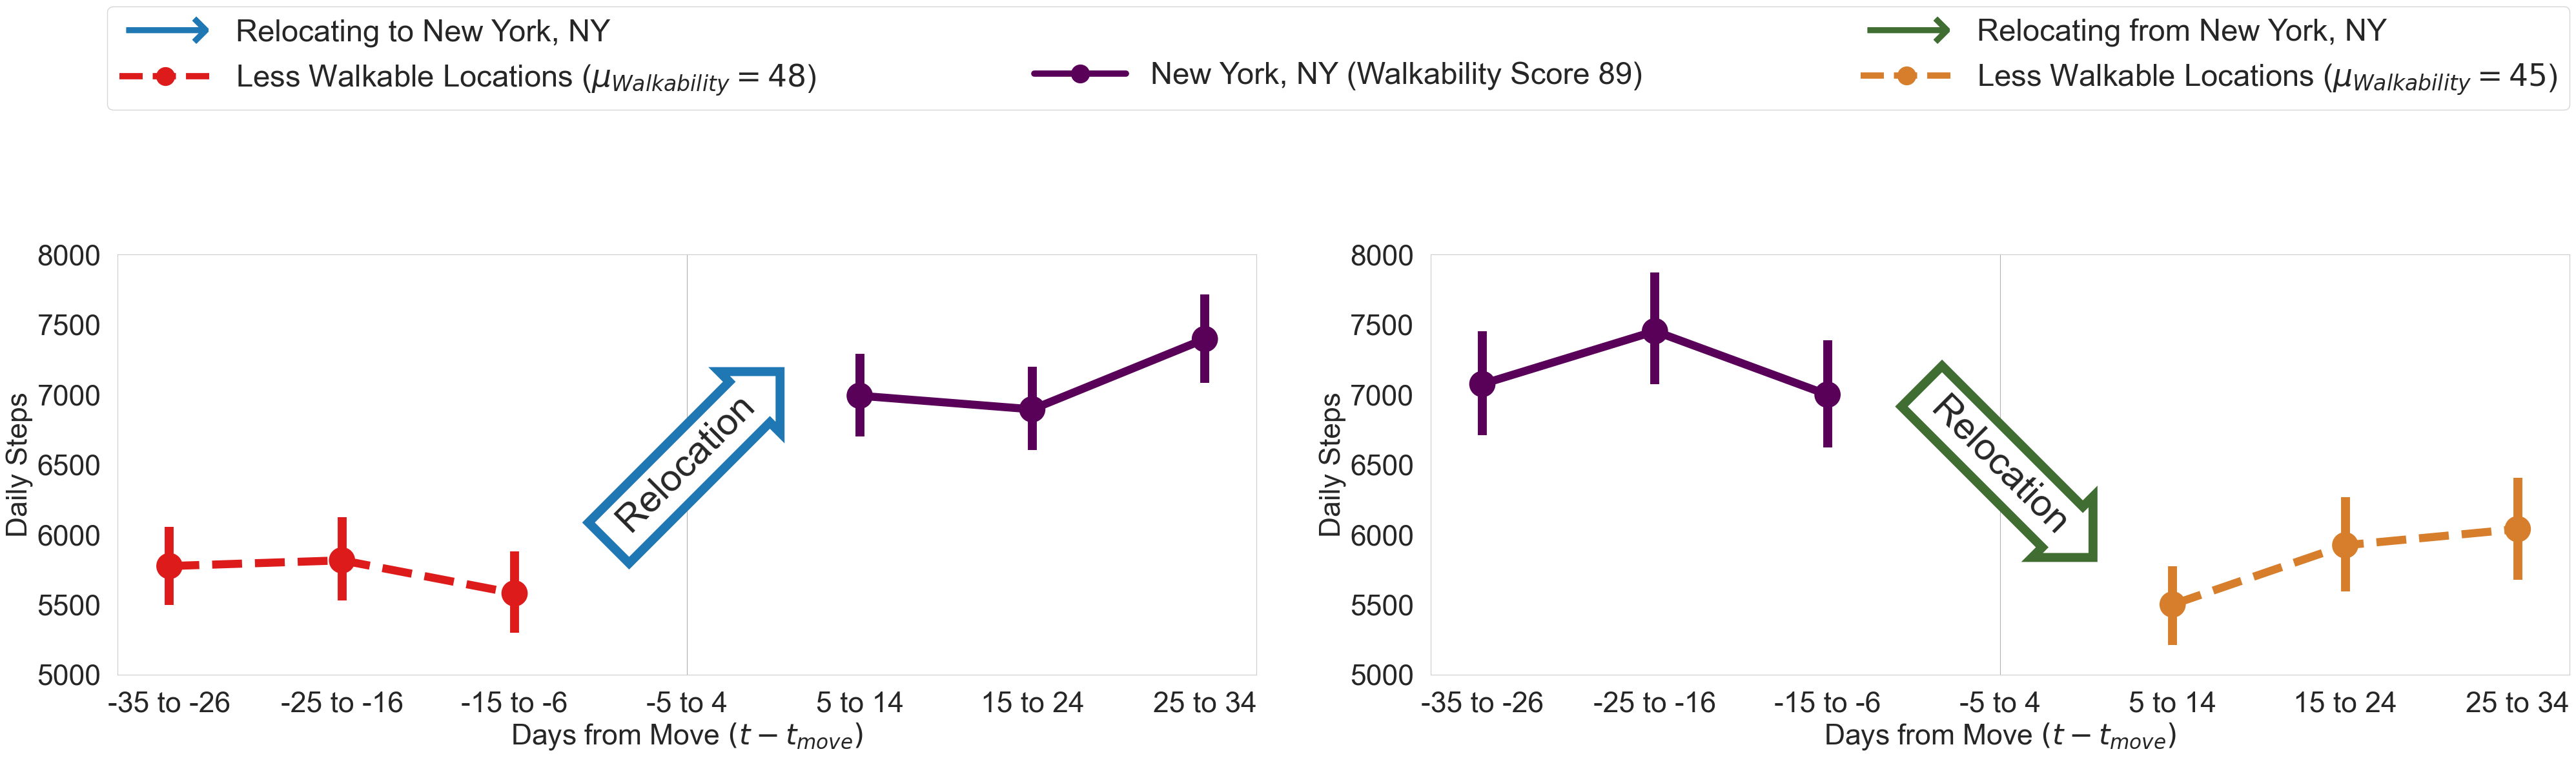

In [12]:
left_point_color = '#de1b1b'
nyc_color = '#590059'
left_arrow_color = '#1f78b4'
right_point_color = '#d77e2d'
right_arrow_color = '#3f6d32'

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(40,10))
plot_df(axarr[0], combined_df[combined_df['info'] == '* to New York, NY from below'], 
        left_arrow_color, 
        left_point_color, 
        nyc_color,
        left_linestyle='--', middle_text_rotation=45)
plot_df(axarr[1], combined_df[combined_df['info'] == 'New York, NY to * from above'], 
        right_arrow_color, 
        nyc_color,
        right_point_color,
        right_linestyle='--', middle_text_rotation=-45)

lw = 7.
markersize = 20.
line_nyc_dot, = plt.plot([], [], color=nyc_color, ls='-', lw=lw, marker="o", markersize=markersize)
line_left_point_dot, = plt.plot([], [], color=left_point_color, ls='--', lw=lw, marker="o", markersize=markersize)
line_right_point_dot, = plt.plot([], [], color=right_point_color, ls='--', lw=lw, marker="o", markersize=markersize)
white_line, = plt.plot([], [], color='white')
left_arrow = plt.scatter([], [], c=left_arrow_color, marker=r'$\longrightarrow$', s=9000)
right_arrow = plt.scatter([], [], c=right_arrow_color, marker=r'$\longrightarrow$', s=9000)

bb = (fig.subplotpars.left, fig.subplotpars.top+0.04, 
      fig.subplotpars.right-fig.subplotpars.left,.1)

handles = [left_arrow, 
           line_left_point_dot, 
           white_line,
           line_nyc_dot,
           right_arrow,
           line_right_point_dot]
labels = [ 'Relocating to New York, NY',
          r'Less Walkable Locations ($\mu_{Walkability} = 48$)',
           '',
           'New York, NY (Walkability Score 89)',
           'Relocating from New York, NY',
          r'Less Walkable Locations ($\mu_{Walkability} = 45$)']
lgd = axarr[0].legend(handles, labels,
                bbox_to_anchor=bb, mode="expand", loc="lower left",
                ncol=3, borderaxespad=0., handlelength=3.,
                bbox_transform=fig.transFigure, fontsize=axis_fontsize+2, frameon=True);

for ax in axarr:
    ax.tick_params(axis='both', which='major', pad=15)

fig.tight_layout(w_pad=7.)
fig.savefig('../output/fig1ef.pdf', 
            bbox_extra_artists=(lgd,), bbox_inches='tight',
            dpi=300)